In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
from __future__ import division
import sklearn.linear_model as lm

%matplotlib inline

#read in csv files
classA = pd.read_csv('classA.csv', header=0)
probeA = pd.read_csv('probeA.csv', header=0)
probeB = pd.read_csv('probeB.csv', header=0)

#create single dataset with class labels and training flags
#append class label and random assignment of training flags
trainData = np.append(probeA,classA,axis=1)
trainFlag = np.random.choice([0,1], size=(1000,1), p=[1./3,2./3])
trainData = np.append(trainData,trainFlag,axis=1)

#save as new csv file
np.savetxt("trainData.csv", trainData, delimiter=",")
dataFrame = pd.read_csv('trainData.csv', header=None, \
                        names=['TNA', 'c1', 'c2', 'c3', 'm1', 'm2', 'm3', 'n1', 'n2', 'n3', 'p1', 'p2', 'p3', \
                               'class', 'train'])

#list of headers
headers = ['TNA', 'c1', 'c2', 'c3', 'm1', 'm2', 'm3', 'n1', 'n2', 'n3', 'p1', 'p2', 'p3', 'class']
dataFrame

,TNA,c1,c2,c3,m1,m2,m3,n1,n2,n3,p1,p2,p3,class,train
0,-0.189296,0.124775,70.741967,12.177545,-3.433427,-43.721830,0.385338,0.160100,73.949379,1.195837,7.803141,97.160886,-0.997134,0.0,1.0
1,2.144297,14.953041,72.255481,12.858266,-6.786612,-43.935637,-1.619007,0.467148,71.182499,3.409903,11.758057,98.523213,-2.193062,1.0,1.0
2,2.706694,14.425223,73.203182,12.992426,-6.308155,-43.891505,-6.759144,0.432735,64.637896,3.831878,11.741983,97.289543,2.246772,1.0,0.0
3,1.385838,9.747685,74.650972,12.706682,-9.552669,-44.577393,-8.690158,0.983934,71.838427,6.163006,10.192664,98.282226,-3.159107,1.0,0.0
4,-0.316911,6.169579,76.019596,12.152148,-3.076418,-43.358934,-4.711047,0.729167,70.658659,3.673529,10.438819,97.809950,-0.632657,0.0,1.0
5,1.224430,7.021108,70.027186,12.486246,-5.382805,-43.733269,-10.847195,0.414281,71.448852,2.978203,11.762093,97.069914,0.368308,0.0,1.0
6,1.781206,8.632815,68.124086,12.637572,-1.778905,-43.817512,-10.347515,0.648381,74.950953,3.893351,16.243794,97.050538,-2.233554,0.0,1.0
7,3.041133,-3.453999,67.521693,12.670258,-4.224271,-43.980083,-8.175942,-0.020897,66.466669,0.054675,10.424807,98.903519,3.028650,1.0,1.0
8,2.686163,11.326008,69.517122,12.767453,-5.150517,-44.494734,-5.405305,0.501906,72.370139,1.956066,7.535359,98.055009,1.516696,1.0,1.0
9,3.143849,11.447776,69.481512,12.956812,-4.733734,-44.230928,0.032886,1.087734,70.527185,6.270763,9.628878,98.859950,-1.359685,1.0,0.0


In [2]:
#create training data set and standardise - preprocessing function
#x is input csv, headers = list of headers, tlabel = target (class in our case)
#isTrain = flag for training dataset
def scaleData(dataFrame, headers):
    df = dataFrame.copy()
    dm = df.as_matrix()
    
    column = 0
    #means and stds for all columns
    for header in headers:
        mean = df[header].mean()
        std = df[header].std()
        for row in range(0,len(dm)):
            dm[row][column] = (dm[row][column]-mean)/std
        column += 1
    
    #suppress scientific form
    np.set_printoptions(suppress=True)
    #save new data as csv
    np.savetxt("scaledData.csv", dm, delimiter=",")
    #read in new csv with scaled data
    scaledData = pd.read_csv('scaledData.csv', header=None, \
                             names=['TNA', 'Cryptonine-1', 'Cryptonine-2', 'Cryptonine-3','Mermaidine-1',\
                                    'Mermaidine-2', 'Mermaidine-3','Neraidine-1', 'Neraidine-2', 'Neraidine-3', \
                                    'Posidine-1', 'Posidine-2', 'Posidine-3', 'Class', 'Train'])
    return scaledData

scaleTest = scaleData(dataFrame, headers)

In [3]:
scaleTest

,TNA,Cryptonine-1,Cryptonine-2,Cryptonine-3,Mermaidine-1,Mermaidine-2,Mermaidine-3,Neraidine-1,Neraidine-2,Neraidine-3,Posidine-1,Posidine-2,Posidine-3,Class,Train
0,-0.907866,-0.562014,0.150961,-1.105848,0.651122,0.492034,1.201022,-1.112533,1.154080,-1.097243,-0.685809,-1.423329,0.004538,-1.085113,1.0
1,1.106822,1.881055,0.900859,1.223136,-0.717723,0.118946,0.738755,-0.108829,0.450474,0.126371,0.558464,0.923330,-0.496023,0.920641,1.0
2,1.592362,1.794093,1.370415,1.682144,-0.522407,0.195955,-0.446727,-0.221323,-1.213788,0.359578,0.553407,-1.201713,1.362290,0.920641,0.0
3,0.452012,1.023433,2.087749,0.704514,-1.846890,-1.000904,-0.892081,1.580480,0.617274,1.647886,0.065969,0.508221,-0.900365,0.920641,0.0
4,-1.018041,0.433913,2.765860,-1.192739,0.796861,1.125278,0.025630,0.747678,0.317264,0.272065,0.143413,-0.305291,0.157092,-1.085113,1.0
5,0.312662,0.574209,-0.203191,-0.049675,-0.144658,0.472073,-1.389564,-0.281646,0.518207,-0.112210,0.559734,-1.580032,0.576050,-1.085113,1.0
6,0.793351,0.839750,-1.146117,0.468066,1.326535,0.325071,-1.274321,0.483600,1.408775,0.393550,1.969741,-1.613407,-0.512971,-1.085113,1.0
7,1.881097,-1.151644,-1.444584,0.579896,0.328281,0.041388,-0.773486,-1.704190,-0.748740,-1.727912,0.139004,1.578422,1.689549,0.920641,1.0
8,1.574638,1.283474,-0.455912,0.912434,-0.049833,-0.856666,-0.134488,0.004789,0.752486,-0.677099,-0.770057,0.116832,1.056714,0.920641,1.0
9,1.969776,1.303536,-0.473555,1.560297,0.120307,-0.396331,1.119735,1.919790,0.283831,1.707438,-0.111406,1.503373,-0.147209,0.920641,0.0


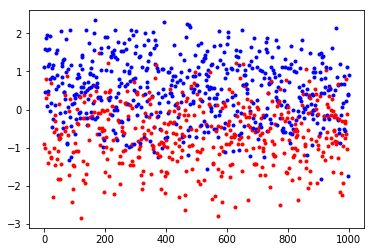

In [8]:
#TNA
for i in range(0,len(scaleTest)):
    if (df[i][13] < 0):
        #red - 0
        plt.plot(i, df[i][0], 'r.')
    else:
        #blue - 1
        plt.plot(i, df[i][0], 'b.')

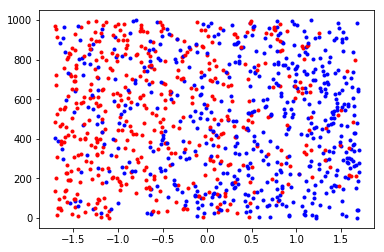

In [25]:
#c3
for i in range(0,len(scaleTest)):
    if (df[i][13] < 0):
        #red - 0
        plt.plot(df[i][3], i, 'r.')
    else:
        #blue - 1
        plt.plot(df[i][3], i, 'b.')

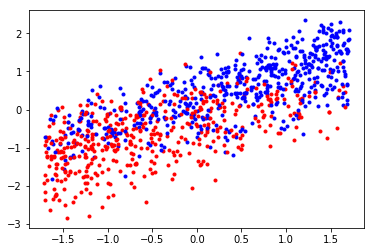

In [23]:
#plt.plot(scaleTest['TNA'],scaleTest['Cryptonine-3'])
df = scaleTest.as_matrix()
for i in range(0,len(scaleTest)):
    if (df[i][13] < 0):
        #red - class 0
        plt.plot(df[i][3], df[i][0], 'r.')
    else:
        #blue - class 1
        plt.plot(df[i][3], df[i][0], 'b.')

##### TNA and Cryptonine-3 are the biggests indicators of Class

In [9]:
#computes entropy for binary/discrete classes
def entropy(dataFrame, aClass, bClass, tlabel):
    df = dataFrame.copy()
    na = (df[tlabel] <= aClass).sum()
    nb = (df[tlabel] >= bClass).sum()
    n = na + nb
    
    if na == 0 or nb == 0:
        entropy = 0
    else:
        entropy = -((na/n)*math.log((na/n),2) + (nb/n)*math.log((nb/n),2))

    return entropy

In [10]:
entropy(scaleTest, 0, 0, 'Class')

0.99514420898484213

In [11]:
#entropy function that splits the data in half and calculates entropy of each half
#We will be using class colour-coded plot results in the decision tree building process with appropriate thresholds
#threshold = value to split in half at
#attribute = which attribute we're looking at
#tvalue = target value threshold
#tlabel = target label
def entropySum(dataFrame, threshold, attribute, tvalue, tlabel):
    df = dataFrame.copy()
    #find column numbers (for referencing matrix in loops - can't iterate over a dataFrame)
    aColumn = df.columns.get_loc(attribute)
    tColumn = df.columns.get_loc(tlabel)
    dm = df.as_matrix()
    
    # 'counters'
    np1 = 0
    nn1 = 0
    np2 = 0
    nn2 = 0
    
    #iterate over each row
    for i in range(0,len(df)):
        #check if a datapoint is above threshold for specified attribute (in our case, above 0 for TNA)
        if dm[i][aColumn] > threshold:
            #check if that same point is of class 0
            if dm[i][tColumn] <= tvalue:
                np1 += 1
            #or of class 1
            elif dm[i][tColumn] > tvalue:
                nn1 += 1
        #otherwise if it's below the threshold
        elif dm[i][aColumn] <= threshold:
            if dm[i][tColumn] <= tvalue:
                #add to a separate counter (since we've split our data into two halves)
                np2 += 1
            elif dm[i][tColumn] > tvalue:
                nn2 += 1
                
    #sum up our instances in each half
    #number of datapoints in first half
    n1 = np1 + nn1
    #second half
    n2 = np2 + nn2
    #total datapoints
    n = n1 + n2
    
    #first half entropy
    if np1 == 0 or nn1 == 0:
        entropy1 = 0
    else:
        #definition of entropy
        entropy1 = -((np1/n1)*math.log((np1/n1),2) + (nn1/n1)*math.log((nn1/n1),2))
    
    #second half entropy
    if np2 == 0 or nn2 == 0:
        entropy2 = 0
    else:
        entropy2 = -((np2/n2)*math.log((np2/n2),2) + (nn2/n2)*math.log((nn2/n2),2))

    #sum of these entropies
    sumEnt = (n1/n)*entropy1 + (n2/n)*entropy2
    
    return sumEnt

In [12]:
entropySum(scaleTest, 0, 'TNA', 0, 'Class')

0.8148643868707741

In [13]:
entropySum(scaleTest, 0, 'Cryptonine-3', 0, 'Class')

0.8931693284618629

In [14]:
entropySum(scaleTest, 0, 'Class', 0, 'Class')

0.0

In [15]:
#information gain function
def infoGain(dataFrame, attribute, aClass, bClass, tlabel, threshold, tvalue):
    df = dataFrame.copy()
    #initial entropy
    sEntropy = entropy(df, aClass, bClass, tlabel)
    #size of "split" data
    sSize = len(df)
    #call the entropy function that splits up dataFrame and sums up each section to give us:
    # ∑_i (S_ui/S)*entropy(S_ui)
    sumEnt = entropySum(dataFrame,threshold, attribute, tvalue,tlabel)
    
    #definition of information gain
    infogain = sEntropy - sumEnt
    print infogain

In [28]:
infoGain(scaleTest, 'TNA', -0.5, 0.5, 'Class', 0, 0)

0.180279822114


In [17]:
#coefficient of determination function
#r2 ("r squared") ranges between 0 and 1
#want to maximise r2
def getRsquared(model,training,testing,tLabel):
    model.fit(training.drop(tLabel,axis=1),training[tLabel])
    r2 = model.score(testing.drop(tLabel,axis=1),testing[tLabel])
    print r2

#scale data function
scaledDataFrame = scaleData(dataFrame, headers)

#if training flag = 1, add entry to training dataset
trainingData = scaledDataFrame[scaledDataFrame['Train']==1].copy()
trainingData = trainingData.drop('Train',axis=1)

#if training flag = 0, add entry to test dataset
testData = scaledDataFrame[scaledDataFrame['Train']==0].copy()
testData = testData.drop('Train',axis=1)

In [18]:
#OLS model - using default parameters
lrModel = lm.LinearRegression()
print "Linear Regression: "
getRsquared(lrModel,trainingData,testData,'Class')

#Ridge model - use CV variant to set the best regularisation strength
ridgeModel = lm.RidgeCV(alphas=(0.1,1.0,10.0),cv = 10)
print "Ridge Regression: "
getRsquared(ridgeModel,trainingData,testData,'Class')

#Lasso model
lassoModel = lm.LassoCV()
print "Lasso Regression: "
getRsquared(lassoModel,trainingData,testData,'Class')

Linear Regression: 
0.429930779862
Ridge Regression: 
0.430069613752
Lasso Regression: 
0.431475135586


In [55]:
#Decision tree
#Code taken and adapted from
#https://github.com/arthur-e/Programming-Collective-Intelligence/blob/master/chapter7/treepredict.py
#Divides a set on a specific column. Can handle numeric
#or nominal values
def divideSet(rows,column,value):
    # Make a function that tells us if a row is in the first group (true) or the second group (false)
    split_function=None
    if isinstance(value,int) or isinstance(value,float):
        split_function=lambda row:row[column]>=value
    else:
        split_function=lambda row:row[column]==value
    
    # Divide the rows into two sets and return them
    set1=[row for row in rows if split_function(row)]
    set2=[row for row in rows if not split_function(row)]
    return set1, set2

In [58]:
set1, set2 = divideSet(df, 0, 0)
labels = ['TNA', 'Cryptonine-1', 'Cryptonine-2', 'Cryptonine-3','Mermaidine-1',\
          'Mermaidine-2', 'Mermaidine-3','Neraidine-1', 'Neraidine-2', 'Neraidine-3', \
          'Posidine-1', 'Posidine-2', 'Posidine-3', 'Class', 'Train']
set1 = pd.DataFrame.from_records(set1, columns=labels)
set2 = pd.DataFrame.from_records(set2, columns=labels)

In [62]:
print entropy(set1, 0, 0, 'Class'), entropy(set2, 0, 0, 'Class')

0.746329928843 0.881773521784


In [20]:
#last line of function
#<DataFrameName>.to_csv('classB.csv')